In [3]:
import pandas as pd
read = pd.read_excel("../data/Online Retail.xlsx")
read.dropna(inplace=True)
read["TotalSum"] = read["UnitPrice"] * read["Quantity"]
read["InvoiceDate"] = pd.to_datetime(read["InvoiceDate"].dt.strftime('%Y-%m-%d'))
snapshot = read["InvoiceDate"].max()
snapshot = snapshot + pd.Timedelta(days=1)
customer_group = read.groupby("CustomerID")
recency = (snapshot - customer_group["InvoiceDate"].max())
monetary = customer_group["TotalSum"].sum()
frequency = customer_group["InvoiceNo"].nunique()
tenure = snapshot - customer_group["InvoiceDate"].min()
rfm = rfm = pd.DataFrame()
rfm["Recency"] = recency.dt.days 
rfm["Frequency"] = frequency
rfm["Monetary"] = monetary
rfm["Tenure"] = tenure.dt.days


rfm.head()


,Recency,Frequency,Monetary,Tenure
CustomerID,,,,
12346.0,326,2,0.00,326
12347.0,3,7,4310.00,368
12348.0,76,4,1797.24,359
12349.0,19,1,1757.55,19
12350.0,311,1,334.40,311


In [4]:

rfm.describe()

,Recency,Frequency,Monetary,Tenure
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,92.581199,5.075480,1898.459701,226.304209
std,100.772139,9.338754,8219.345141,118.384168
min,1.000000,1.000000,-4287.630000,1.000000
25%,17.000000,1.000000,293.362500,116.000000
50%,51.000000,3.000000,648.075000,254.000000
75%,144.000000,5.000000,1611.725000,332.000000
max,374.000000,248.000000,279489.020000,374.000000


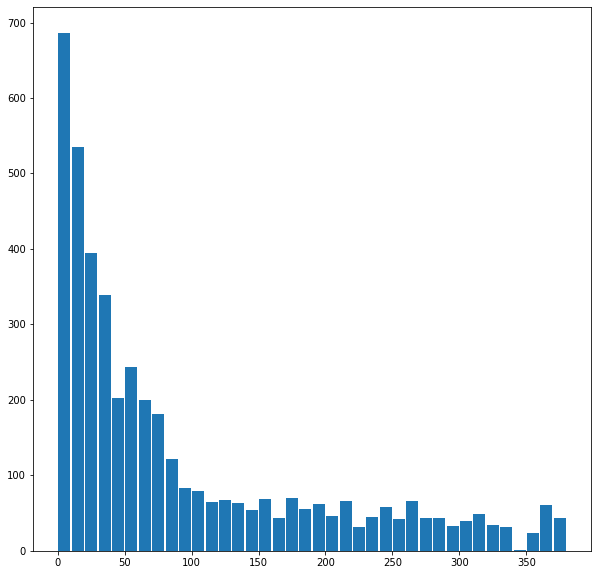

In [7]:
import matplotlib.pyplot as plt
import numpy as np
recency = rfm["Recency"]
bins = np.arange(0,390,10)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(recency,bins=bins,rwidth=0.9)
ax

In [8]:

rfm["Churn"] = 0
rfm.head()

,Recency,Frequency,Monetary,Tenure,Churn
CustomerID,,,,,
12346.0,326,2,0.00,326,0
12347.0,3,7,4310.00,368,0
12348.0,76,4,1797.24,359,0
12349.0,19,1,1757.55,19,0
12350.0,311,1,334.40,311,0


In [12]:
churn_condition = rfm["Recency"] >= 150
rfm[churn_condition]["Churn"] = 1
rfm

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Recency,Frequency,Monetary,Tenure,Churn
CustomerID,,,,,
12346.0,326,2,0.00,326,0
12347.0,3,7,4310.00,368,0
12348.0,76,4,1797.24,359,0
12349.0,19,1,1757.55,19,0
12350.0,311,1,334.40,311,0
...,...,...,...,...,...
18280.0,278,1,180.60,278,0
18281.0,181,1,80.82,181,0
18282.0,8,3,176.60,127,0


In [18]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4372 non-null   int64  
 1   Frequency  4372 non-null   int64  
 2   Monetary   4372 non-null   float64
 3   Tenure     4372 non-null   int64  
 4   Churn      4372 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 204.9 KB


In [15]:
rfm.loc[churn_condition,"Churn"] = 1
rfm

,Recency,Frequency,Monetary,Tenure,Churn
CustomerID,,,,,
12346.0,326,2,0.00,326,1
12347.0,3,7,4310.00,368,0
12348.0,76,4,1797.24,359,0
12349.0,19,1,1757.55,19,0
12350.0,311,1,334.40,311,1
...,...,...,...,...,...
18280.0,278,1,180.60,278,1
18281.0,181,1,80.82,181,1
18282.0,8,3,176.60,127,0


In [17]:
rfm[rfm['Churn'] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1057 entries, 12346.0 to 18281.0
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    1057 non-null   int64  
 1   Frequency  1057 non-null   int64  
 2   Monetary   1057 non-null   float64
 3   Tenure     1057 non-null   int64  
 4   Churn      1057 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 49.5 KB


In [19]:
rfm["Churn"].value_counts()

0    3315
1    1057
Name: Churn, dtype: int64

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = rfm.loc[:,["Frequency","Monetary","Tenure"]].values
y = rfm.loc[:,["Churn"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_predict_test = dt_model.predict(X_test)

print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       819
           1       0.78      0.76      0.77       274

    accuracy                           0.89      1093
   macro avg       0.85      0.84      0.85      1093
weighted avg       0.88      0.89      0.88      1093



In [25]:
y_predict = dt_model.predict(X)
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3315
           1       0.94      0.94      0.94      1057

    accuracy                           0.97      4372
   macro avg       0.96      0.96      0.96      4372
weighted avg       0.97      0.97      0.97      4372



In [26]:
dt_model.feature_importances_

array([0.16164176, 0.33863632, 0.49972192])

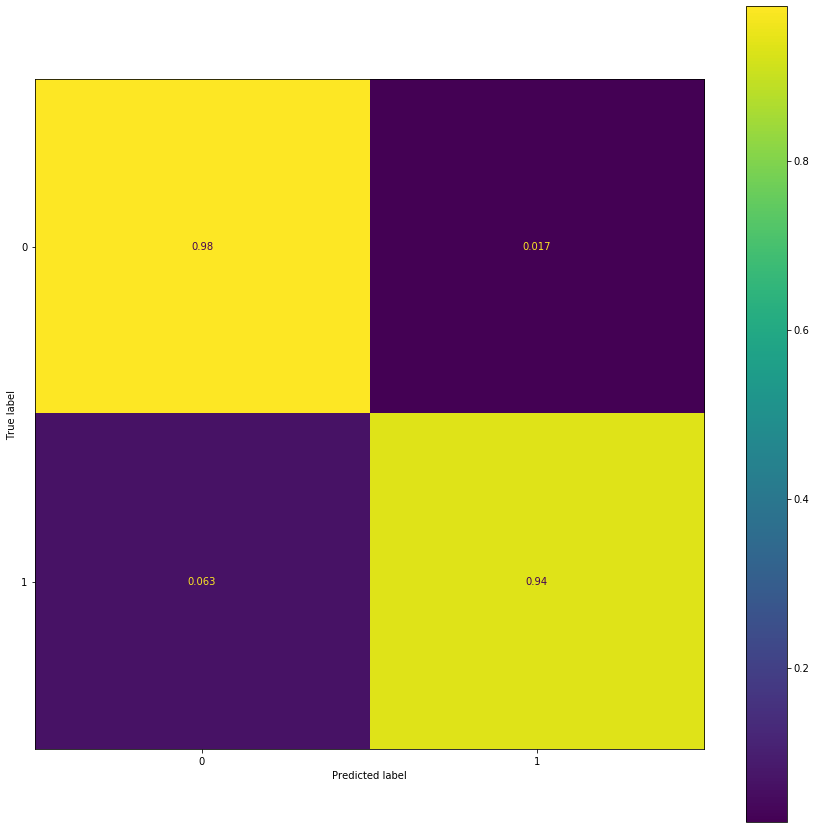

In [34]:
from sklearn.metrics import plot_confusion_matrix


fig1 = plt.figure(figsize=(15, 15))

ax1 = fig1.add_subplot(1,1,1)

plot_confusion_matrix(dt_model, X, y, ax=ax1, normalize="true")